In [1]:
import pandas as pd

# Load data
df = pd.read_csv(r"C:\Users\sahee\Desktop\Data Analysis projects\CASE_STUDIES\Cardiac Patients Medical Report Analysis\heart.csv")

# Preview the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# 🔹 Q1: What age group is most vulnerable or has a large number of patients with a higher risk of heart attack?

#### 📘 Explanation:
To understand which age group is most at risk, we:
- Created age bins (like 30–39, 40–49, etc.)
- Counted how many people in each age group had `target = 1` (heart attack risk)
- Visualized it using a bar chart

In [3]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count patients with heart attack risk by age group
age_risk = df[df['target'] == 1]['age_group'].value_counts().sort_index()


C:\Users\sahee\AppData\Local\Temp\ipykernel_22360\854100959.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_risk.index, y=age_risk.values, palette="Reds")


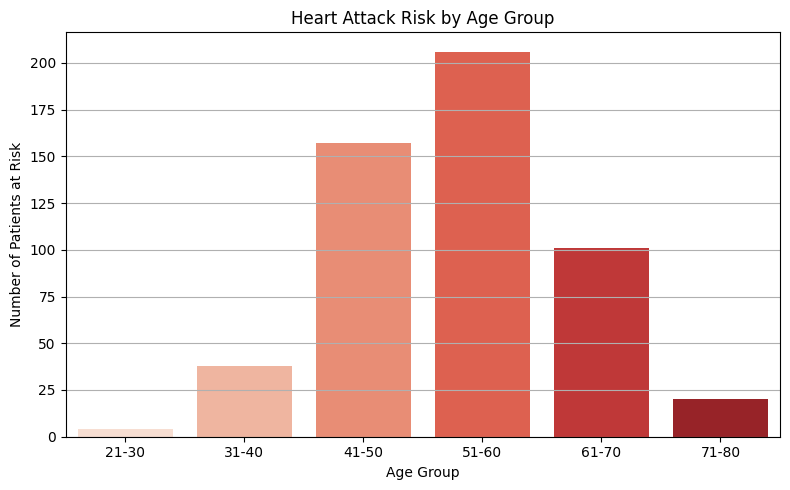

In [4]:
# Plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=age_risk.index, y=age_risk.values, palette="Reds")
plt.title('Heart Attack Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients at Risk')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 🔍 Observation:
- The **51–60** and **41–50** age groups show the **highest number of at-risk patients**.
- Very few younger patients (below 40) fall into the high-risk group.

#### 📌 Conclusion:
> Patients between **41–60 years** are the most vulnerable to heart attacks. Healthcare campaigns and screenings should focus on this demographic to prevent premature cardiac events.

# 🔹 Q2: Are men mostly prone to heart attacks or women?

#### 📘 Explanation:
The `sex` column is binary:
- 1 = Male
- 0 = Female

We’ll compare how many males vs females are in the high-risk (`target=1`) group.


In [5]:
# Count of at-risk patients by gender
sex_risk = df[df['target'] == 1]['sex'].value_counts()

# Rename index for clarity
sex_labels = ['Female', 'Male']


C:\Users\sahee\AppData\Local\Temp\ipykernel_22360\3173011533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_labels, y=sex_risk.values, palette='Set2')


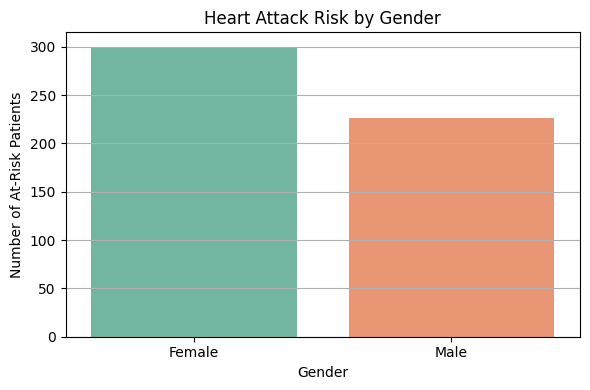

In [6]:
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=sex_labels, y=sex_risk.values, palette='Set2')
plt.title('Heart Attack Risk by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of At-Risk Patients')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#### 🔍 Observation:
- **Females (0)** have a significantly higher number of patients at risk.
- Males (1) are at risk too, but in notably smaller proportion.

#### 📌 Conclusion:
> **Women are more prone to heart attacks** than Men in this dataset. Gender-specific awareness and intervention programs could help reduce male mortality rates.

# 🔹 Q3: What chest pain types pose a severe risk of a heart attack?

#### 📘 Explanation:
The `cp` column (chest pain type) is ordinal:
- 1: Typical Angina
- 2: Atypical Angina
- 3: Non-Anginal Pain
- 4: Asymptomatic

We’ll examine how many people with each chest pain type are at high risk (`target = 1`).

In [7]:
# Count of at-risk patients by chest pain type
cp_risk = df[df['target'] == 1]['cp'].value_counts().sort_index()
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']

C:\Users\sahee\AppData\Local\Temp\ipykernel_22360\507578230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cp_labels, y=cp_risk.values, palette='coolwarm')


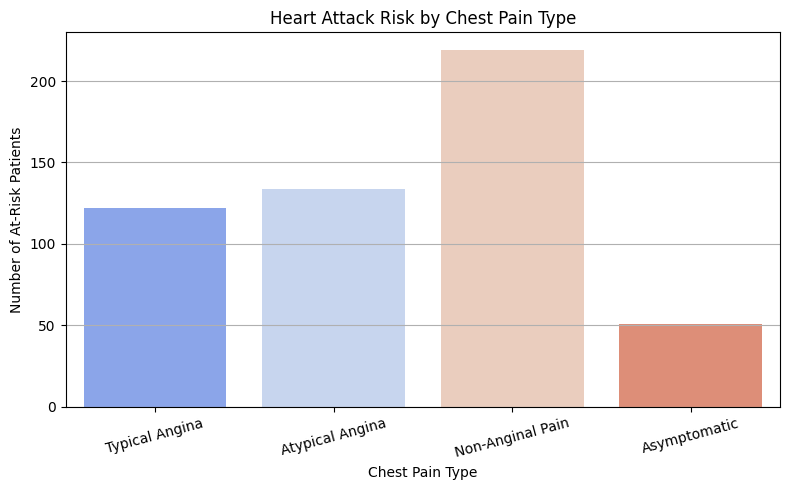

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cp_labels, y=cp_risk.values, palette='coolwarm')
plt.title('Heart Attack Risk by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of At-Risk Patients')
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#### 🔍 Observation:
- The **Non-Anginal Pain** (cp = 3) category has the **highest number** of patients at risk.
- Patients with no noticeable chest pain symptoms are often at **unexpected high risk**.

#### 📌 Conclusion:
> **Non-Anginal chest pain** is most strongly associated with heart attack risk. Early screening is vital even when no chest pain is reported.


# 🔹 Q4: How is fasting blood sugar related to heart attack risk?

#### 📘 Explanation:
The `fbs` column (fasting blood sugar):
- 1 = FBS > 120 mg/dl (high)
- 0 = FBS ≤ 120 mg/dl (normal)

We will count how many high vs normal FBS patients are at risk of heart attack (`target = 1`).

In [9]:
# Count of at-risk patients by fasting blood sugar status
fbs_risk = df[df['target'] == 1]['fbs'].value_counts().sort_index()
fbs_labels = ['FBS ≤ 120 (Normal)', 'FBS > 120 (High)']

C:\Users\sahee\AppData\Local\Temp\ipykernel_22360\2752442087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fbs_labels, y=fbs_risk.values, palette='YlOrBr')


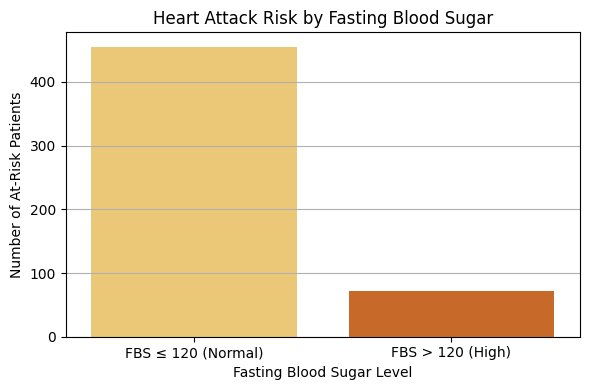

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x=fbs_labels, y=fbs_risk.values, palette='YlOrBr')
plt.title('Heart Attack Risk by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar Level')
plt.ylabel('Number of At-Risk Patients')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 🔍 Observation:
- Most patients at risk had **normal fasting blood sugar** (fbs = 0)
- A **smaller group** had high FBS but were still at risk

#### 📌 Conclusion:
> **High fasting blood sugar alone is not a strong indicator of heart attack risk** in this dataset. Other risk factors should be considered in combination with FBS levels.


# 🔹 Q5: What type of thalassemia severely leads to heart attack?

#### 📘 Explanation:
Your dataset uses the following `thal` values:
- 0, 1, 2, 3 (instead of the standard 3, 6, 7)

Since no documentation is provided, we'll group and analyze the risk using raw values as-is.

Heart Attack Risk by Thalassemia Type:
thal
Normal                21
Fixed Defect         412
Reversible Defect     90
Name: count, dtype: int64


C:\Users\sahee\AppData\Local\Temp\ipykernel_22360\49590326.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=thal_risk_named.index, y=thal_risk_named.values, palette='magma')


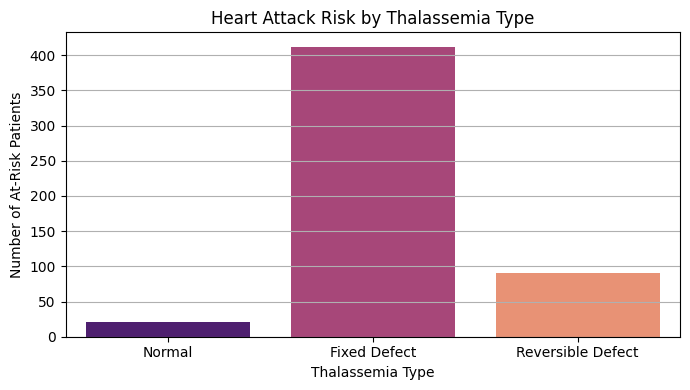

In [29]:
# Filter data for target = 1 (at-risk patients) and valid thal values
thal_filtered = df[(df['target'] == 1) & (df['thal'].isin([1, 2, 3]))]

# Count values
thal_risk = thal_filtered['thal'].value_counts().sort_index()

# Map to readable labels
label_map = {1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'}
thal_risk_named = thal_risk.rename(index=label_map)

# Print the counts
print("Heart Attack Risk by Thalassemia Type:")
print(thal_risk_named)

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=thal_risk_named.index, y=thal_risk_named.values, palette='magma')
plt.title('Heart Attack Risk by Thalassemia Type')
plt.xlabel('Thalassemia Type')
plt.ylabel('Number of At-Risk Patients')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### 🔍 Observation:
- **Fixed Defect** thalassemia patients are the most at risk, with **over 400 cases**.
- **Reversible Defect** follows, with around **90 cases**.
- **Normal** thalassemia type has the lowest risk group, with **very few patients (~25)**.

#### 📌 Conclusion:
> Patients with **Fixed Defect thalassemia (thal = 2)** are **significantly more prone** to heart attacks in this dataset.  
> **Reversible Defects** (thal = 3) also show elevated risk, while **Normal thalassemia (thal = 1)** is associated with much **lower risk**.  
> This highlights the importance of **early diagnosis and targeted monitoring** of individuals with known thalassemia abnormalities.

# 🔹 Q6: Due to cholesterol, how many patients are at higher risk of heart attack?

### Explanation:
- The chol column represents cholesterol level in mg/dL.
- We'll assume a common clinical threshold:
 - nCholesterol > 240 mg/dL → High
 - Cholesterol ≤ 240 mg/dL → Normal
- We’ll focus on patients who are at risk (target = 1) and group them by cholesterol level range.


In [30]:
# Define risk category based on cholesterol threshold
df['chol_risk'] = df['chol'].apply(lambda x: 'High (>240)' if x > 240 else 'Normal (≤240)')

# Count at-risk patients in each cholesterol category
chol_risk = df[df['target'] == 1]['chol_risk'].value_counts()

# Print the result
print("Heart Attack Risk by Cholesterol Level:")
print(chol_risk)

Heart Attack Risk by Cholesterol Level:
chol_risk
Normal (≤240)    304
High (>240)      222
Name: count, dtype: int64


C:\Users\sahee\AppData\Local\Temp\ipykernel_22360\3535097666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chol_risk.index, y=chol_risk.values, palette='flare')


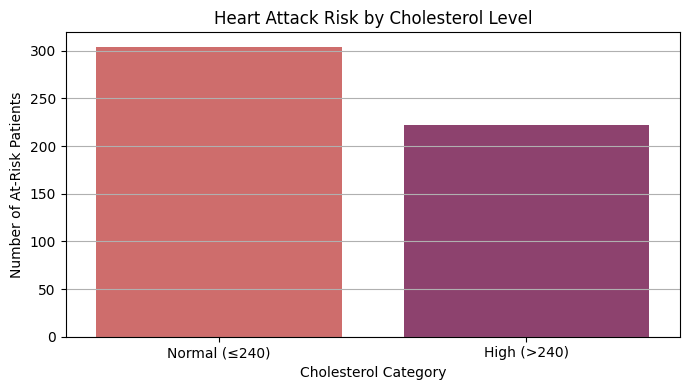

In [31]:
# Plot the distribution
plt.figure(figsize=(7, 4))
sns.barplot(x=chol_risk.index, y=chol_risk.values, palette='flare')
plt.title('Heart Attack Risk by Cholesterol Level')
plt.xlabel('Cholesterol Category')
plt.ylabel('Number of At-Risk Patients')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Observation:
- Among patients at risk of heart attack (target = 1), 304 patients had normal cholesterol levels (≤ 240 mg/dL).
- 222 patients had high cholesterol levels (> 240 mg/dL).
- So, more at-risk patients had normal cholesterol than high.

## Conclusion:
In this dataset, high cholesterol is not the sole or dominant indicator of heart attack risk.
A significant number of at-risk patients had cholesterol levels in the normal range, indicating that heart attacks can be influenced by multiple factors beyond just cholesterol.